In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
#User should change input nodes and hidden nodes as per input size
import tensorflow as tf
import pandas as pd
import cv2
import glob
import numpy as np
import random
from google.colab.patches import cv2_imshow

In [ ]:
#Image size is 44 because it is ideal to fit in most types of cells
sz=44
xc=11
yc=55
input_nodes=sz*sz
hidden_nodes=2000
output_nodes =sz*sz
# For adding gaussian noise to image
def noisy(image):
      row,col= image.shape
      mean = 0
      var = 100
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col))
      gauss = gauss.reshape(row,col)
      noisy = image + gauss
      return noisy

In [ ]:
#fetch images
#user should change the path to their input
# change xc and yc to change the dimension of images wherexc and yc are coordinates and sz is pixels along one dimension 
sz=44
xc=11
yc=55
input_nodes=sz*sz
hidden_nodes=2000
output_nodes =sz*sz
train_x_list=glob.glob("drive/My Drive/tdata/rbc/*.png")
train_x_list.extend(glob.glob("drive/My Drive/tdata/10/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/20/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/cd4/*.png"))
train_x_list.extend(glob.glob("drive/My Drive/tdata/cd8/*.png"))
#random.shuffle(train_x_list)
print(train_x_list)
train_images=[]
train_lis = []
x_list = []
train_lis_auginp = []
noise=[]
noise_test = []
for i in range(len(train_x_list)):
  if(i%50==0):
    x_list.append(cv2.imread(train_x_list[i],0)[xc:yc,xc:yc].flatten())
  else:
    train_lis_auginp.append(cv2.imread(train_x_list[i],0)[xc:yc,xc:yc])
    train_images.append(cv2.imread(train_x_list[i],0)[xc:yc,xc:yc].flatten())
    #noise.append(noisy(cv2.imread(train_x_list[i],0))[11:55,11:55].flatten())
    #cv2_imshow(np.resize(noise[i],(44,44)))
#saving input list before conv to np array
train_lis = train_images
train_images=np.array(train_images)

#x_list contains test images and train_lis contains train images


In [ ]:
train_lis_auginp = np.array(train_lis_auginp)
train_lis_auginp = np.reshape(train_lis_auginp,(train_lis_auginp.shape[0],train_lis_auginp.shape[1],train_lis_auginp.shape[2],1))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
k = 0
#Augmenting images  (not necessary but done to increase data set size)
datagen = ImageDataGenerator(rotation_range=90)
it = datagen.flow(train_lis_auginp, batch_size=1)
datagen2 = ImageDataGenerator(rotation_range=180)
it2 = datagen2.flow(train_lis_auginp, batch_size=1)
datagen3 = ImageDataGenerator(rotation_range=270)
it3 = datagen3.flow(train_lis_auginp, batch_size=1)
for i in range(train_lis_auginp.shape[0]):
  img = it.next()
  img = img.flatten()
  train_lis.append(img)
  img = it2.next()
  img = img.flatten()
  train_lis.append(img)
  img = it3.next()
  img = img.flatten()
  train_lis.append(img)
random.shuffle(train_lis)
k = np.array(train_lis)
print(k.shape)

(5292, 1936)


#Preprocess images

In [ ]:
#final array is k
#% of training set
rng = k.shape[0]-(k.shape[0]//10)
noise_train_out = []
print(rng)
noise = []
#train_final = k[:rng]
#test_final = k[rng:]
for i in range(k.shape[0]):
  noise.append(noisy(np.reshape(train_lis[i],(sz,sz))).flatten())
  #cv2_imshow(np.resize(noise[i],(44,44)))
noise_train = np.array(noise)
#noise_train = noise_train[:rng]
#noise_test = noise_train[rng:]
#noise_train_out = k[:rng]
#noist_test_out = k[rng:]
noise_trai = noise_train
#noise_test = noise_train[2001:2010]
noise_train_out = k
#noist_test_out = k[2001:2010]
noise_test_out = np.array(x_list)
print(noise_test_out.shape[0])
noise_test = []
for j in range(noise_test_out.shape[0]):
  #print(j)
  noise_test.append(noisy(np.reshape(noise_test_out[j],(sz,sz))).flatten())
noise_test = np.array(noise_test)
print(np.amax(noise_test))
print(np.amax(noise_test_out))
print(np.amin(noise_test_out))
print(noise_test.shape)

4763
28
217.48220633127198
200
40
(28, 1936)


In [ ]:
def relu(inp):
    fin=[]
    for i in range(len(inp)):
      if(inp[i]>0):
        fin.append(inp[i])
      else:
        fin.append(0.0001*inp[i])
    
    return np.array(fin)

def relud(inp):
    fin=[]
    fin=np.multiply(relu(inp),np.subtract(1,relu(inp)))
    return np.array(fin)
    

ELM

In [ ]:
w1=np.array([[random.random() for i in range(input_nodes)] for i in range(hidden_nodes)])
w2=np.array([[random.random() for i in range(hidden_nodes)] for i in range(output_nodes)])

In [ ]:

accc=[]
def mdl(x_train,diff):
    eta=0.01
    #Training image and target image
    x_train=np.true_divide(x_train,255)
    diff=np.true_divide(diff,255)
    global w1,w2,accc
    #print(w1.shape,w2.shape)
    lss=[]
    pn=(np.identity(hidden_nodes)/100)
    
    for i in range(1):
        for j in range(len(x_train[:])):
            #print(j)
            #eta*=1.01
            #dfd=(x_train[j].reshape((28,28)))
            #cv2.imshow(str(j),np.array(dfd))
            y1=np.matmul(w1,x_train[j])
            #print("y1-",y1.shape)
            theta1=np.array([relu(y1)])
            #print("theta1-",theta1.shape)
            out=np.matmul(w2,theta1.T)
            #print(out)
            theta2=np.array([relu(out)])
            sm=0
            
            for k in range(len(diff[0])):
              sm+=((diff[j][k]-theta2[0][k][0])*(diff[j][k]-theta2[0][k][0]))
            accc.append(sm)
            #print("theta2-",theta4) 
            #In case of 1st iteration we need to initalize all  weights 0 and diagonal to a very small positive real number.
            if(j==0 and i==0):
              pn=(np.identity(hidden_nodes)/10000+np.matmul(theta1.T,theta1))
            else:
              pn=pn+np.matmul(theta1.T,theta1)
            #print(pn.shape)
            opt=np.array([diff[j]])
            #print(opt.shape)
            err=(opt-np.matmul(theta1,w2.T))
            #print(err.shape)
            #print(theta1.shape)
            #pninv=np.linalg.inv(pn)
            #print(pninv.shape)
            #inerp=np.matmul(pninv,theta1.T)
            inerp=np.linalg.solve(pn,theta1.T)
            w2=w2+np.matmul(err.T,inerp.T)
            #print(w2.shape)
            su=0
            '''for k in range(1936):
                su+=(theta2[0][k]-diff[j][k])**2
            lss.append(su)'''
            '''if(i%1==0):
              print("orig")
              #cv2_imshow(np.resize(np.multiply(x_traintime complexity of finding matrix inverse[j],255),(44,44)))
              print("recon ")
              #plt.figure(figsize=(3,3))
              #plt.imshow(np.resize(np.multiply(theta2,255),(44,44)), origin="upper",cmap="gray")
              #plt.show()
                  
              #cv2_imshow(np.resize(np.multiply(theta2,255),(44,44)))
            if(i%1==0):    
              #plt.plot(lss[:])
              #plt.show()
              print(i)'''
    plt.plot(accc[1:])
    plt.savefig('img.png')
    plt.show()
    import csv
    with open('val.csv', 'w', newline='') as csvfile:
      spamwriter = csv.writer(csvfile)
    spamwriter.writerow(accc[1:])


In [ ]:
mdl(noise_trai,noise_train_out)
print("-------------------------------------------------------------------------------------------------------------------------------------")
print("*************************************TRAINING COMPLETE*****************************************************")

In [ ]:
# print(accc)

In [ ]:
import csv
csvfile=open('val.csv','w')
obj=csv.writer(csvfile)
obj.writerow(accc)
csvfile.close()

In [ ]:
print(np.amax(noise_test_out))

200


#Testing and results

(28, 1936)
orig


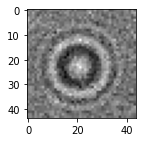

expected


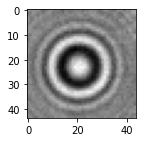

recon 


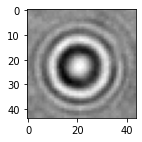

orig


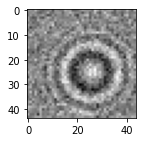

expected


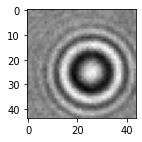

recon 


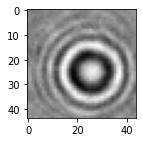

orig


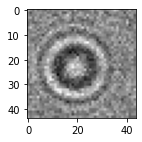

expected


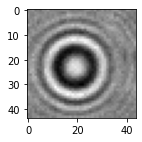

recon 


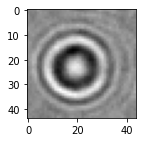

orig


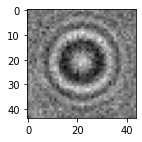

expected


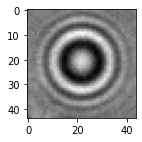

recon 


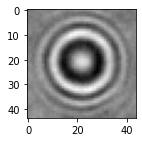

orig


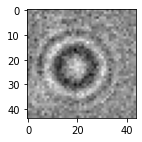

expected


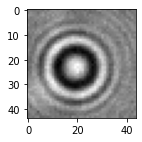

recon 


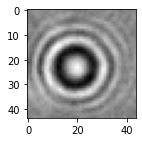

orig


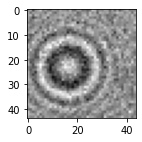

expected


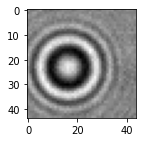

recon 


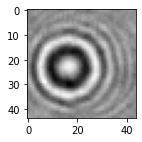

orig


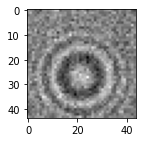

expected


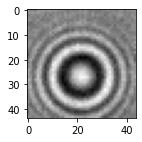

recon 


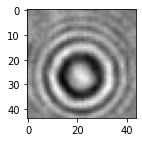

orig


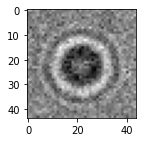

expected


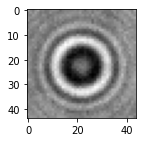

recon 


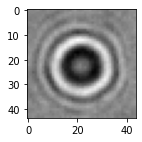

orig


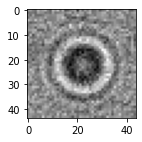

expected


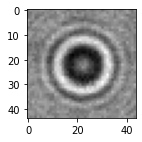

recon 


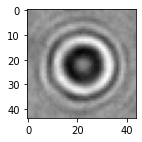

orig


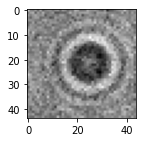

expected


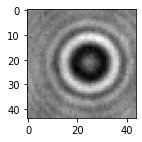

recon 


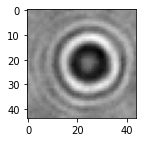

orig


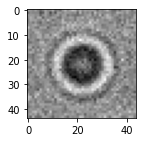

expected


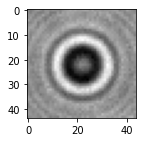

recon 


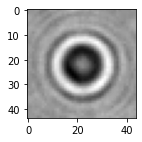

orig


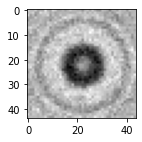

expected


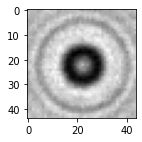

recon 


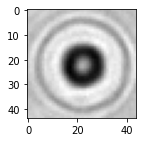

orig


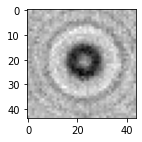

expected


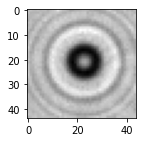

recon 


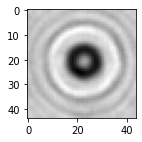

orig


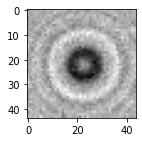

expected


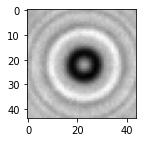

recon 


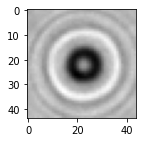

orig


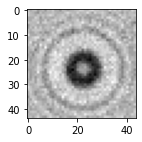

expected


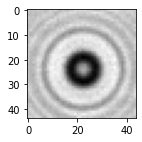

recon 


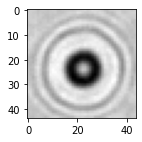

orig


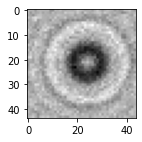

expected


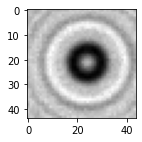

recon 


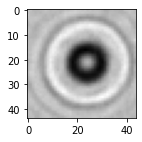

orig


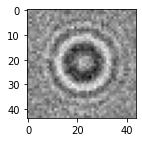

expected


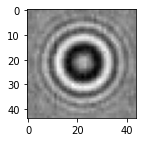

recon 


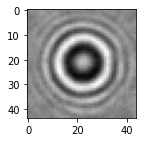

orig


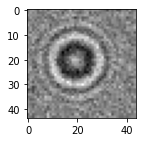

expected


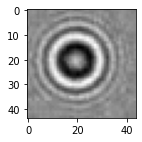

recon 


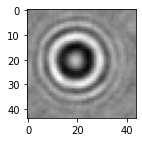

orig


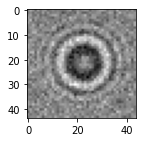

expected


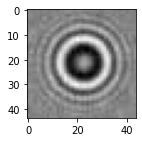

recon 


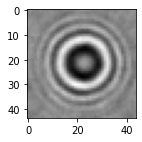

orig


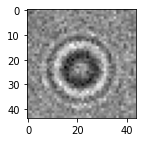

expected


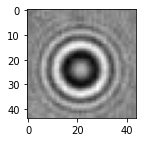

recon 


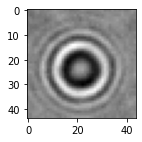

orig


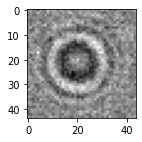

expected


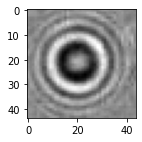

recon 


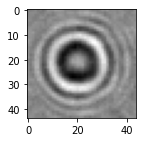

orig


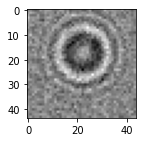

expected


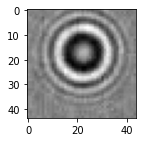

recon 


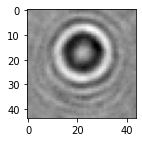

orig


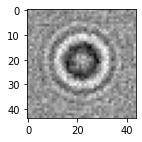

expected


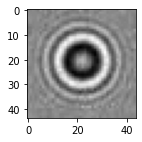

recon 


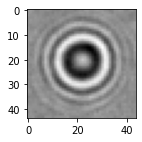

orig


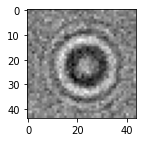

expected


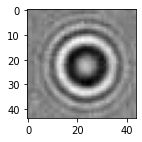

recon 


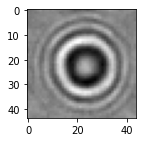

orig


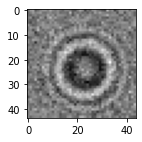

expected


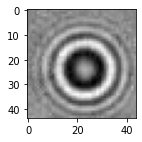

recon 


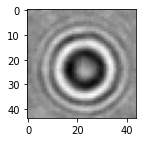

orig


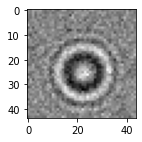

expected


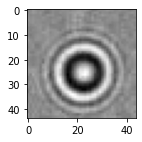

recon 


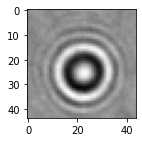

orig


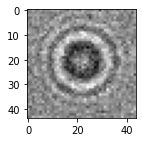

expected


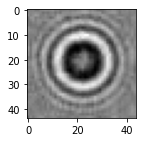

recon 


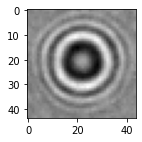

orig


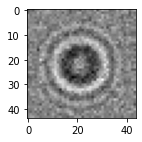

expected


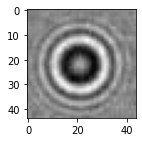

recon 


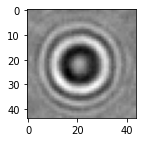

In [ ]:
import scipy
print(noise_test.shape)
#x_test=np.true_divide(noise_test,255)
#print(x_test.shape)
recon = []
for j in range(noise_test.shape[0]):
  y1=np.matmul(w1,noise_test[j])
  #print("y1-",y1)
  theta1=relu(y1)
  #print("theta3-",theta3)
  out=np.matmul(w2,theta1)
  #print(out)
  theta2=relu(out)
  recon.append(theta2)
            
  if(j%1==0):
    print("orig")
    #plt.figure(figsize=(3,3))
    #plt.imshow(np.resize(np.multiply(noise_test[j],255),(44,44)), origin="upper",cmap="gray")
    #plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(noise_test[j],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/elmnsy/elmnsy"+str(j)+".png",np.resize(noise_test[j],(44,44)),cmap='gray')
    plt.show()
    print("expected")
    #plt.figure(figsize=(3,3))
    #plt.imshow(np.resize(np.multiply(noise_test_out[j],255),(44,44)), origin="upper",cmap="gray")
    #plt.show()
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(noise_test_out[j],(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/elminp/elminp"+str(j)+".png",np.resize(noise_test_out[j],(44,44)),cmap='gray')
    plt.show()
    #cv2_imshow(np.resize(np.multiply(noise_test[j],255),(44,44)))
    print("recon ")
    #cv2_imshow(np.resize(np.multiply(theta2,255),(44,44)))
    plt.figure(figsize=(2,2))
    plt.imshow(np.resize(np.multiply(theta2,255),(sz,sz)),cmap="gray")
    plt.imsave("drive/My Drive/elma/elmop/elmop"+str(j)+".png",np.resize(np.multiply(theta2,255),(44,44)),cmap='gray')
    plt.show()
    

In [ ]:
recon = np.array(recon)
print(recon.shape)

(28, 1936)


In [ ]:
np.save("weight1",w1)
np.save("weight2",w2)

#Analysis (using SNR)

In [ ]:
print(np.amax(noise_test_out))
print(np.amax(noise_test))
print(np.amin(noise_test))
print(np.amax(recon))
print(np.amin(recon))

200
217.48220633127198
18.377388312230476
197.99829911396955
35.12360877422907


In [ ]:
#a = noise_test_out
#b = np.true_divide(noise_test,255)
aa = []
bb = []
cc = []
for lk in range(noise_test_out.shape[0]):
  a = noise_test_out[lk]
  a  = (a - np.amin(a))/(np.amax(a)-np.amin(a))
  aa.append(a)
  b = noise_test[lk]
  b  = (b - np.amin(b))/(np.amax(b)-np.amin(b))
  bb.append(b)
  c = recon[lk]
  #c = np.true_divide(recon,255)
  c  = (c - np.amin(c))/(np.amax(c)-np.amin(c))
  cc.append(c)
aa = np.array(aa)
bb = np.array(bb)
cc = np.array(cc)
print(np.amax(bb))

1.0


In [ ]:
import math
import matplotlib.pyplot as pypt
def snr5(imgarr,noisarr,reconarr):
    imgar = []
    noisar  = []
    reconar = []
    snrfinal = []
    snr = []
    a = []
    b = []
    k = []
    l = []
    m = []
    snrinar = []
    snroutar = []
    for t in range(imgarr.shape[0]):
        imgar = imgarr[t].reshape(sz,sz)
        noisar = noisarr[t].reshape(sz,sz)
        reconar = reconarr[t].reshape(sz,sz)
        k = imgar[22][:]
        l = noisar[22][:]
        m = reconar[22][:]
        a = np.subtract(k,l)
        b = np.subtract(k,m)
        diff1 = sum(map(lambda i : i * i, a))
        diff2 = sum(map(lambda i : i * i, b))
        img = sum(map(lambda i: i * i,imgar[sz//2][:]))
        snrin =  10 * math.log(img/diff1,10)
        snrout =  10 * math.log(img/diff2,10)
        snrimp = snrout - snrin
        #if(snrimp>0):
        snrfinal.append(snrimp)
        snrinar.append(snrin)
        snroutar.append(snrout)
        snr = []
        imgar = []
        noisar  = []
        reconar = []
    return snrfinal,snrinar,snroutar
snratio = []
snrinar = []
snroutar =  []
snratio,snrinar,snroutar = snr5(aa,bb,cc)
print("SNR 5")
print(snratio)
print(snrinar)
print(snroutar)
print(np.mean(snratio))
print(np.mean(snrinar))
print(np.mean(snroutar))

SNR 5
[3.111313875836222, 5.6043106058164085, 7.124119642948324, 6.267587926162397, 3.2580463998298352, 7.34373859335958, 4.838921357527035, 6.989663872523057, 4.453781786143715, 7.581831988623776, 6.633596660249008, 5.492979301829504, 4.420733694954862, 7.068286298362132, 5.424386345960166, 9.903897589900591, 9.447862073777362, 2.7638322121569594, 4.66105657063234, 7.490749232916954, 5.944561098091732, 3.0227216618881894, 6.511161065922577, 6.52938539462472, 6.265959480661213, 7.568047250536541, 6.018620890790956, 5.485358637145241]
[15.373535674167742, 13.812395802602833, 14.58871654297881, 15.525444867291414, 14.202589451567976, 12.495274149084894, 12.28588572343595, 12.881488171524797, 15.094143833545054, 13.282494205024964, 16.51171737627355, 17.907910876704275, 18.674081226782807, 18.395097883509187, 18.57129668411585, 16.080796393456122, 12.241392959063958, 17.066133801649315, 15.742600853121758, 13.282867660957933, 14.66338537902309, 12.463007550376899, 13.744834276340887, 14.7